In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats   # Importamos la librería para estadística
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") # ignorar los future warning

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [3]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

1. Ejercicios intervalo de confianza. Al igual que en el caso del ejercicio de la clase, piensa un motivo por el que sería interesante calcular estos intervalos de confianza para la extracción de insights.

    a: Intervalo de Confianza para la Esperanza de Vida Contexto: Trabajas en una organización de salud global y deseas estimar el intervalo de confianza al 95% para la esperanza de vida promedio de cada continente. Nota: Cuidado porque puede que os salgan algunos nulos, genera un código para que no salgan nulos en los intervalos de confianza.

In [8]:
def calculo_intervalo_confianza (df, columna, nivel_confianza): 

    # calcular la estimacion puntual:
    media = df[columna].mean()

    # después vamos a calcular el error estándar utilizando el método "sem" de la librería stats
    error = stats.sem(df[columna], nan_policy= "omit")

    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1. 
    grados_libertad = len(df[columna]) - 1

    # calculamos el valor crítico de la muestra
    valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)

    # calculamos el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error

    print(f"Intervalo de Confianza para {columna}:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")

In [9]:
intervalo_life_expectancy = calculo_intervalo_confianza(df, "life_expectancy", nivel_confianza=0.95)



Intervalo de Confianza para life_expectancy:
Media Muestral: 72.28
Error Estándar: 0.55
Nivel de Confianza: 0.95
Valor Crítico: 1.97
Intervalo de Confianza: (71.2, 73.36)



b. Intervalo de Confianza para el PIB Contexto: Eres una economista y quieres calcular el intervalo de confianza al 90% para el Producto Interno Bruto (PIB) de los continentes

In [11]:
intervalo_gdp = calculo_intervalo_confianza(df, "gdp", 0.90)

Intervalo de Confianza para gdp:
Media Muestral: 477295901399.54
Error Estándar: 156356459750.61
Nivel de Confianza: 0.9
Valor Crítico: 1.65
Intervalo de Confianza: (218878391528.32, 735713411270.76)


2. Prueba de Hipótesis
    a. Test de Normalidad :Verifica si la variable "life_expectancy" (esperanza de vida) sigue una distribución normal usando el test de Shapiro-Wilk o Kolmogorov-Smirnov según el tamaño de la muestra.

In [ ]:
# vamos a definir una función para poder hacer el t-test de Student
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk (menos de 50 datos) o Kolmogorov-Smirnov (más de 50 datos en muestra).
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).
    Parámetros:
    *args: listas o arrays con los datos de cada grupo.
    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis."""
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
            raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 5000(Hasta 5000 saphiro es robusto, aunque depende tb de otras cosas)
        normalidad.append(p_valor_norm > 0.05)
    #nota sansi: p_valor_norm > 0.05,  ¿qué significa esto?:
    #Si True, significa que no hay suficiente evidencia para rechazar la hipótesis nula (es decir, los datos podrían seguir una distribución normal).
    #Si False, significa que hay suficiente evidencia para rechazar la normalidad.
    datos_normales = all(normalidad)
    # La función all(iterable) en Python: all() devuelve True solo si todos los elementos en normalidad son True.
    # Si al menos un elemento es False, entonces all() devuelve False.
    # Es decir, si datos_normales = True, significa que todos los grupos pasaron la prueba de normalidad.
    # Si datos_normales = False, significa que al menos un grupo no es normal.
    # Prueba de igualdad de varianzas
    if datos_normales: #(if datos_normales == True)
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue   # Test de Levene si no son normales
    varianzas_iguales = p_valor_varianza > 0.05 # Si p_valor_varianza > 0.05, no hay suficiente evidencia para decir que las varianzas son diferentes → Se asume que las varianzas son iguales (varianzas_iguales = True).
    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)" #cuando no hay normalidad
    # Nivel de significancia
    alfa = 0.05
    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }
   # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [ ]:
# Verificar si hay al menos dos grupos

if len(args) < 2:
            raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
# Comprobar normalidad en cada grupo
normalidad = []
for grupo in args:
        if len(grupo) > 5000:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 5000(Hasta 5000 saphiro es robusto, aunque depende tb de otras cosas)
        normalidad.append(p_valor_norm > 0.05)

In [12]:
df.shape # usamos shapiro

(195, 36)

In [14]:
p_valor_norm = stats.shapiro(df["life_expectancy"]).pvalue  # Shapiro-Wilk si n <= 5000(Hasta 5000 saphiro es robusto, aunque depende tb de otras cosas)
if p_valor_norm > 0.05:
    print("se ajusta a una distribucion normal")

else:
    print("no se ajusta a una distribucion normal")

no se ajusta a una distribucion normal


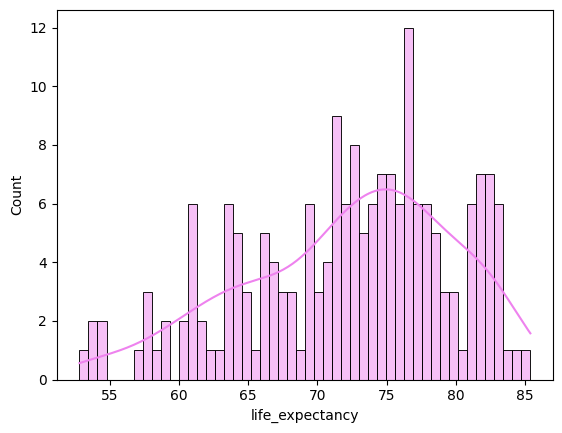

In [19]:
sns.histplot(x = "life_expectancy", data = df, color = "violet", kde = True,  bins= 50);

b- Test de Igualdad de Varianzas: Comprueba si la varianza del PIB (GDP) es igual en países de Europa y África usando el test de Bartlett (si los datos son normales) o Levene (si no son normales).

In [20]:
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Central America', 'South America',
       'Oceania', 'North America', nan], dtype=object)

In [27]:
'gdp' "continent"

df[df["continent"] == "Europe"]["gdp"]

1      1.527808e+10
3      3.154058e+09
9      4.463147e+11
15     6.308046e+10
16     5.296067e+11
21     2.004785e+10
25     8.600000e+10
41     6.041555e+10
43     2.456465e+10
44     2.464892e+11
46     3.480780e+11
55     3.138695e+10
59     2.687612e+11
60     2.715518e+12
63     1.774320e+10
64     3.845630e+12
66     2.098528e+11
73              NaN
75     1.609672e+11
76     2.418804e+10
81     3.886987e+11
83     2.001244e+12
93     3.411720e+10
98     6.552859e+09
99     5.421932e+10
100    7.110492e+10
106    1.478616e+10
112    1.195544e+10
113    7.184844e+09
115    5.494737e+09
122    9.090704e+11
128    1.022078e+10
129    4.033364e+11
139    5.921644e+11
140    2.376861e+11
142    2.500774e+11
143    1.699877e+12
149    1.637931e+09
153    5.140917e+10
157    1.054223e+11
158    5.374216e+10
164    1.394116e+12
168    5.308329e+11
169    7.030824e+11
179    7.544117e+11
183    1.537811e+11
185    2.827113e+12
Name: gdp, dtype: float64